# Section A

# 1.
## a. <u>Bias</u> is the difference between the average prediction of our model and the correct value which we are trying to predict.
## b. <u>Variance</u> is the variability of model prediction for a given data point or a value which tells us the spread of our data
## c. In <u>Overfitting</u> case model learns the details and noise in training data.
## d. <u>Underfitting</u> results in poor performance compared to <u>Overfitting</u>.
## e. To reduce <u>Overfitting</u> fitting use regularization.


# 2.
## Fig A - OVERFITTING
## Fig B - BALANCED FITTING
## Fig C - UNDERFITTING

# Section B

# Table of contents
1. Introduction
1. Importing Libraries
1. Data Loading
1. Data Description and Loading
1. Data Preprocessing
1. Linear Regression Model

# Introduction

The data is to classify whether a person would get a heart attack or not. In the present
dataset we have 14 attributes(or features) whose informations are as follow

1) age in years

2) sex (1 = male; 0 = female)

3) chest pain type (4 values)

4) trestbps- resting blood pressure

5) chol - serum cholesterol in mg/dl

6) fbs - fasting blood sugar > 120 mg/dl

7) restecg - resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by fluoroscopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversible defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

Our output feature is “target”

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Data Loading

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description and Profiling

In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


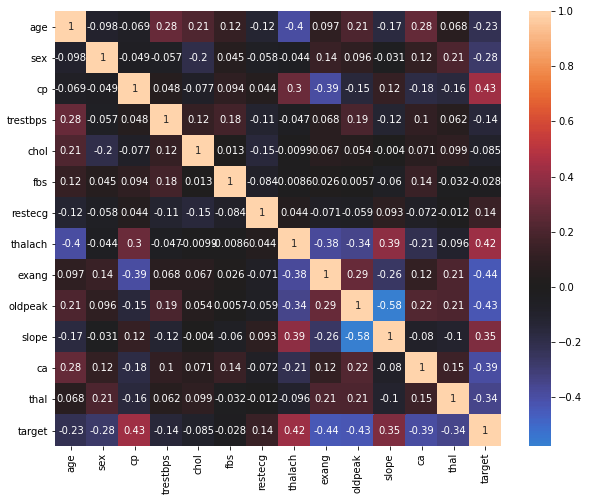

In [ ]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(), center= 0, annot = True)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c45f38bd0>,
      dtype=object)

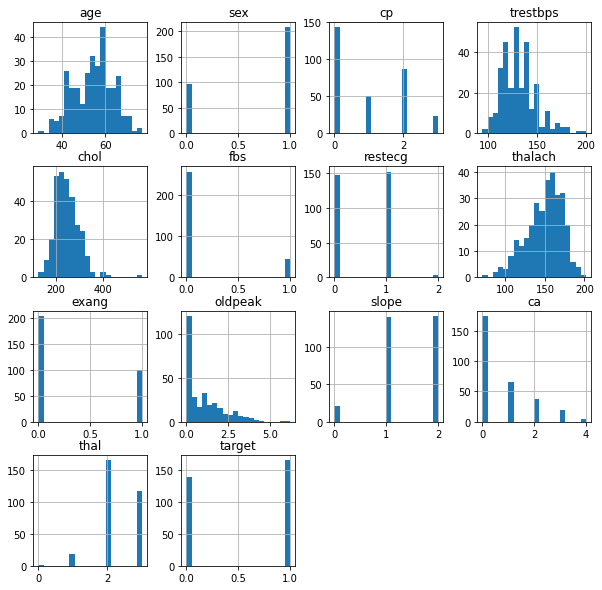

In [ ]:
df.hist(bins=20,figsize=(10, 10))

- Around 200 men have disease while around 100 women have disease.
- Type 0 cp has more target positive.
- fbs is not a great indicator of the target positive.

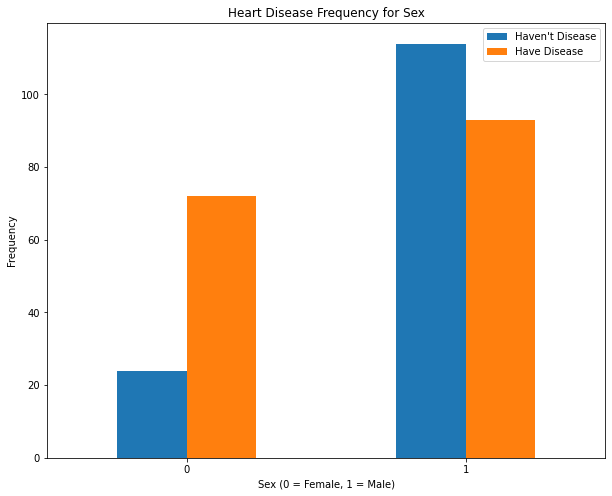

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,8))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
median_age = df.age.median()
median_age

55.0

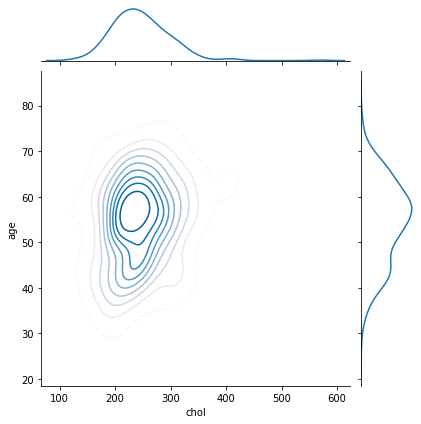

In [ ]:
sns.jointplot(data = df, x='chol', y='age',kind = 'kde',cmap = 'PuBu')

We can observe that the disease rate is lying somewhere around 50 - 60 years of age and 200 -250 cholesterol level.

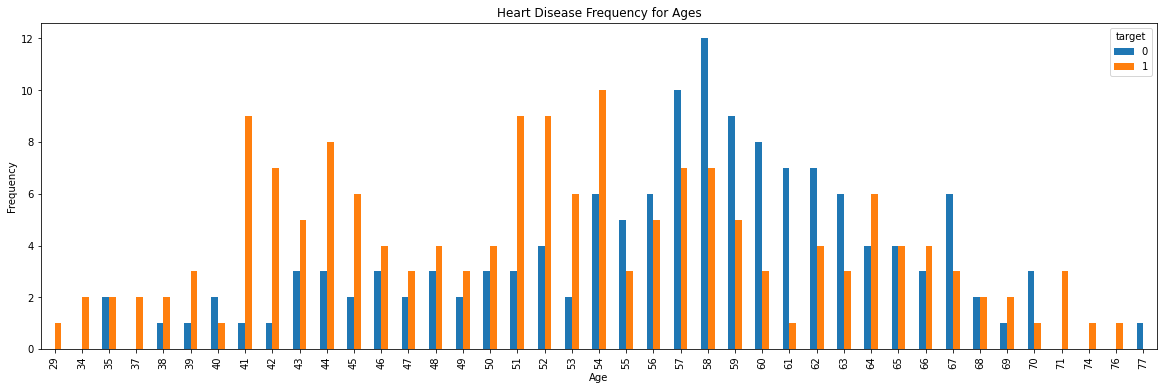

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see People around the age of 50-55 have more Heart disease.

# Data Preprocessing

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We can see that we have no null values at all so this is a very clean dataset.

## Outlier detection

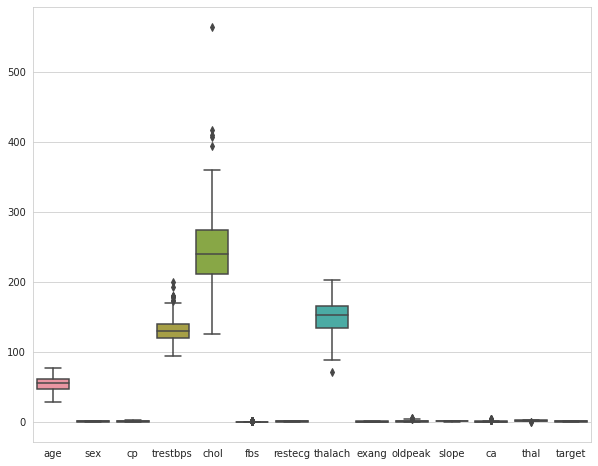

In [ ]:
plt.figure(figsize =(10,8))
sns.set_style("whitegrid") 
sns.boxplot(data = df)

The box plot is showing some outliers so we need to remove them to get a more efficient classification model.

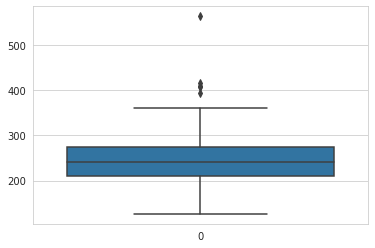

In [ ]:
sns.boxplot(data = df['chol'])

In [ ]:
df = df[df.chol < 360]
df = df[df.trestbps < 170]
df = df[df.thalach > 80]

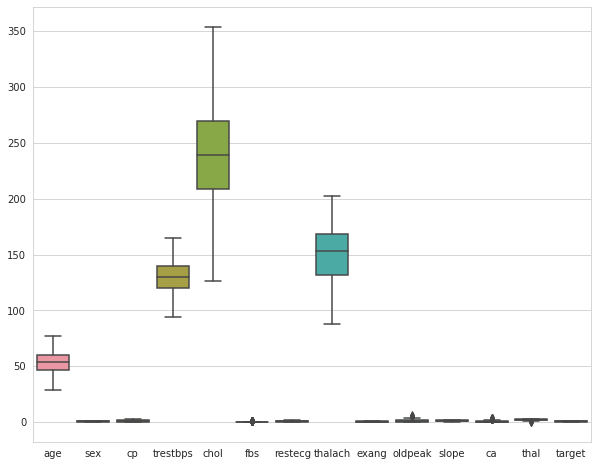

In [ ]:
plt.figure(figsize =(10,8))
sns.set_style("whitegrid") 
sns.boxplot(data = df)

# Logistic Regression Model


In [ ]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [ ]:
xx = df.drop(['target'], axis = 1)
x = (xx - np.min(xx)) / (np.max(xx) - np.min(xx))
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.718310,0.469298,1.0,0.0,0.543860,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.507042,0.543860,0.0,0.5,0.868421,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.507042,0.342105,0.0,0.0,0.736842,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.366197,0.482456,0.0,0.5,0.789474,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.366197,1.000000,0.0,0.5,0.657895,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.647887,0.504386,0.0,0.5,0.307018,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.225352,0.605263,0.0,0.5,0.385965,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.704225,0.293860,1.0,0.5,0.464912,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.507042,0.021930,0.0,0.5,0.236842,1.0,0.193548,0.5,0.25,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
log_regr = LogisticRegression()
log_regr.fit(x_train, y_train)
y_pred = log_regr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

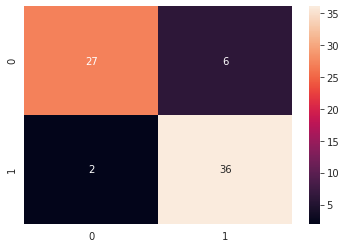

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [ ]:
acc

0.8873239436619719